Menampilkan gambar query: [[[  7  14  11]
  [  5  12   9]
  [ 14  21  18]
  ...
  [115 124 128]
  [112 121 125]
  [113 122 126]]

 [[  1   8   5]
  [  4  11   8]
  [  4  11   8]
  ...
  [112 121 125]
  [113 122 126]
  [111 120 124]]

 [[  0   3   0]
  [  2   9   6]
  [  0   5   2]
  ...
  [113 122 126]
  [117 126 130]
  [116 125 129]]

 ...

 [[ 73  73  73]
  [ 73  73  73]
  [ 74  74  74]
  ...
  [ 97 110 124]
  [ 95 108 122]
  [ 96 109 123]]

 [[ 73  73  73]
  [ 73  73  73]
  [ 74  74  74]
  ...
  [ 92 105 119]
  [ 92 105 119]
  [ 93 106 120]]

 [[ 69  69  69]
  [ 70  70  70]
  [ 72  72  72]
  ...
  [ 91 104 118]
  [ 93 106 120]
  [ 94 107 121]]]


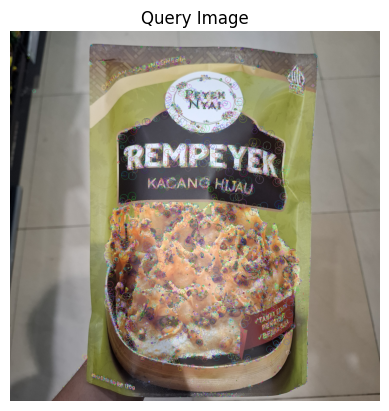

Menampilkan gambar dengan kecocokan tertinggi: ./Foto_dataset//20251121_103224.jpg | Matches: 11247


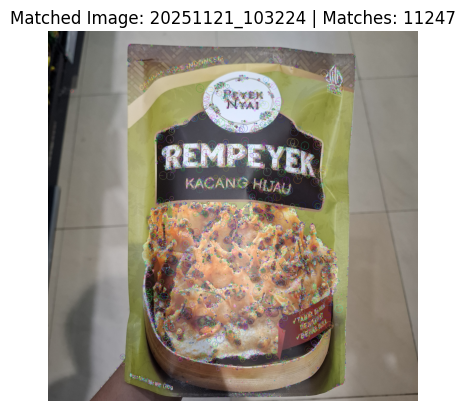

Menampilkan gambar dengan kecocokan tertinggi: ./Foto_dataset//20251121_104942.jpg | Matches: 4310


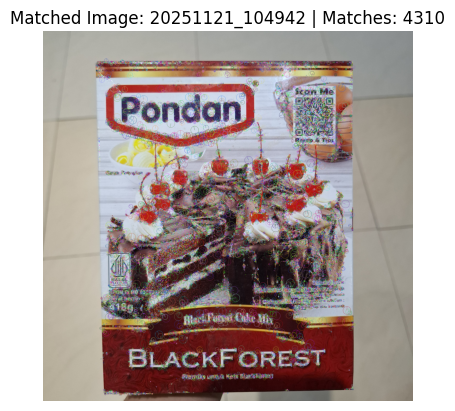

Menampilkan gambar dengan kecocokan tertinggi: ./Foto_dataset//IMG_20251121_103555.jpg | Matches: 4179


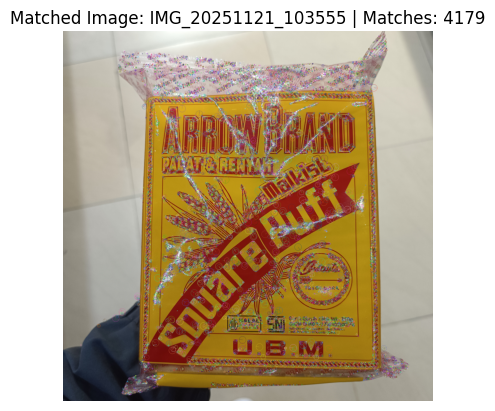

Menampilkan gambar dengan kecocokan tertinggi: ./Foto_dataset//20251121_102756.jpg | Matches: 4098


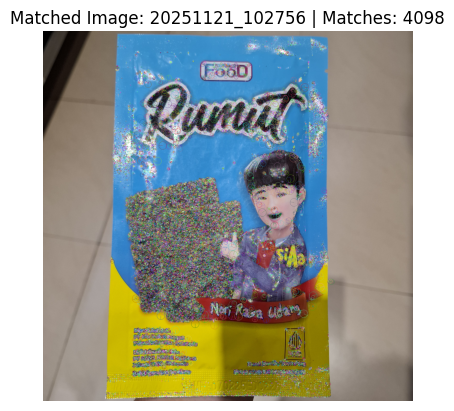

Menampilkan gambar dengan kecocokan tertinggi: ./Foto_dataset//IMG_20251121_103800.jpg | Matches: 4088


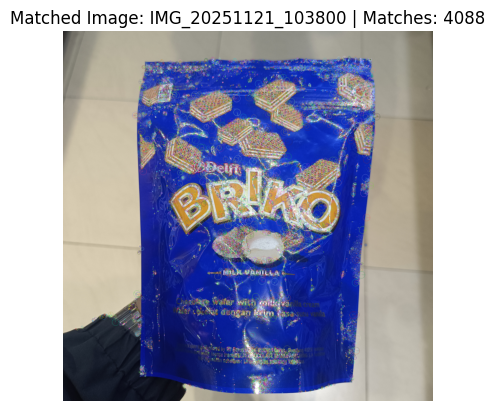

In [ ]:
import cv2
import numpy as np
import os
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

def display_image_with_keypoints(img_bgr, keypoints, title="Image"):
    img_keypoints = cv2.drawKeypoints(img_bgr, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.imshow(cv2.cvtColor(img_keypoints, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

akaze = cv2.AKAZE_create()

dataset_path = './Foto_dataset/'
features = []
for filename in os.listdir(dataset_path): 
    img_name = filename.split(".")[0]
    img = cv2.imread(dataset_path + "/" + filename)
    
    if img is None:
        continue
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kp, des = akaze.detectAndCompute(img_gray, None)
    
    if des is None:
        continue
    
    features.append([img_name, des])

# Gambar query
test_img_bgr = cv2.imread("Foto_dataset/20251121_103224.jpg")
test_img_gray = cv2.cvtColor(test_img_bgr, cv2.COLOR_BGR2GRAY)

kp_test, des_test = akaze.detectAndCompute(test_img_gray, None)

if des_test is None:
    print("Tidak ada deskriptor yang ditemukan pada gambar query.")
    exit()

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

result = []

for name, des in features:
    matches = bf.match(des_test, des)
    distance = len(matches)
    result.append([distance, name])

sorted_results = sorted(result, key=lambda x: x[0], reverse=True)

print(f"Menampilkan gambar query: {test_img_bgr}")
display_image_with_keypoints(test_img_bgr, kp_test, "Query Image")

for distance, name in sorted_results[:5]:
    matched_image_path = dataset_path + "/" + name + ".jpg" 
    matched_img_bgr = cv2.imread(matched_image_path)
    kp_matched, des_matched = akaze.detectAndCompute(cv2.cvtColor(matched_img_bgr, cv2.COLOR_BGR2GRAY), None)
    
    print(f"Menampilkan gambar dengan kecocokan tertinggi: {matched_image_path} | Matches: {distance}")
    display_image_with_keypoints(matched_img_bgr, kp_matched, f"Matched Image: {name} | Matches: {distance}")


AKAZE Matches: 11247
SIFT Matches: 10801
ORB Matches: 500
Menampilkan gambar query: Foto_dataset/20251121_103224.jpg


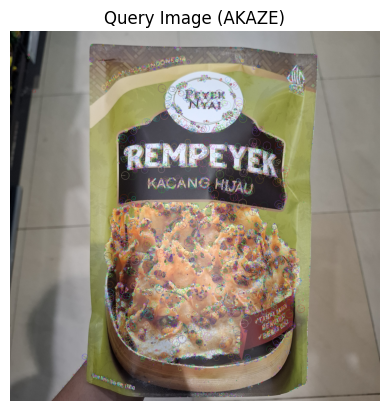

Menampilkan gambar dengan kecocokan tertinggi (AKAZE): ./Foto_dataset//20251121_103224.jpg


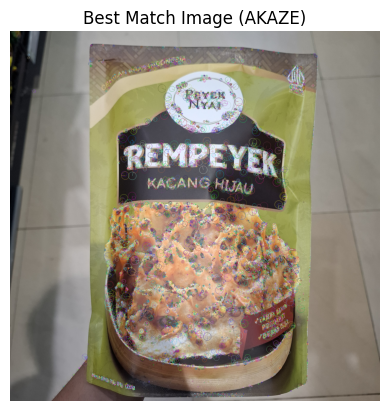

In [28]:
def extract_features_with_akaze(img_gray):
    akaze = cv2.AKAZE_create()
    kp, des = akaze.detectAndCompute(img_gray, None)
    return kp, des

def extract_features_with_sift(img_gray):
    sift = cv2.SIFT_create()
    kp, des = sift.detectAndCompute(img_gray, None)
    return kp, des

def extract_features_with_orb(img_gray):
    orb = cv2.ORB_create()
    kp, des = orb.detectAndCompute(img_gray, None)
    return kp, des

def display_image_with_keypoints(img_bgr, keypoints, title="Image"):
    img_keypoints = cv2.drawKeypoints(img_bgr, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.imshow(cv2.cvtColor(img_keypoints, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

def match_features(des1, des2, descriptor_type):
    if descriptor_type == 'sift':
        bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True) 
    else:
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)  
    matches = bf.match(des1, des2)
    return len(matches)

dataset_path = './Foto_dataset/'
query_image_path = 'Foto_dataset/20251121_103224.jpg'
query_img_bgr = cv2.imread(query_image_path)
query_img_gray = cv2.cvtColor(query_img_bgr, cv2.COLOR_BGR2GRAY)

kp_query_akaze, des_query_akaze = extract_features_with_akaze(query_img_gray)
kp_query_sift, des_query_sift = extract_features_with_sift(query_img_gray)
kp_query_orb, des_query_orb = extract_features_with_orb(query_img_gray)

best_match_image_path = dataset_path + "/20251121_103224.jpg"
best_img_bgr = cv2.imread(best_match_image_path)
best_img_gray = cv2.cvtColor(best_img_bgr, cv2.COLOR_BGR2GRAY)

kp_best_akaze, des_best_akaze = extract_features_with_akaze(best_img_gray)
kp_best_sift, des_best_sift = extract_features_with_sift(best_img_gray)
kp_best_orb, des_best_orb = extract_features_with_orb(best_img_gray)

akaze_matches = match_features(des_query_akaze, des_best_akaze, 'akaze')
sift_matches = match_features(des_query_sift, des_best_sift, 'sift')
orb_matches = match_features(des_query_orb, des_best_orb, 'orb')

print(f"AKAZE Matches: {akaze_matches}")
print(f"SIFT Matches: {sift_matches}")
print(f"ORB Matches: {orb_matches}")

print(f"Menampilkan gambar query: {query_image_path}")
display_image_with_keypoints(query_img_bgr, kp_query_akaze, "Query Image (AKAZE)")

print(f"Menampilkan gambar dengan kecocokan tertinggi (AKAZE): {best_match_image_path}")
display_image_with_keypoints(best_img_bgr, kp_best_akaze, "Best Match Image (AKAZE)")
